In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
pip install -U textblob

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


# **1. Read Data**

In [ ]:
data = pd.read_csv('Elon_musk.csv', encoding="latin-1")
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


# **2. Number of Words**

In [ ]:
#Number of Words in single tweet
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


# **3. Number of Characters**

In [ ]:
#Number of characters in single tweet
data['char_count'] = data['Text'].str.len() ## this also includes spaces
data[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


# **4. Average Word Length**

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head()

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


# **5. Number of stopwords**

In [ ]:
stop = stopwords.words('english')

data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


# **6. Number of Special Characters**

In [ ]:
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


# **7. Number of Numerics**

In [ ]:
data['numerics'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


# **8. Number of Upper Case Words**

In [ ]:
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


# **Pre - Processing**
# Lower Case

In [ ]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

# **Removing Punctuation**

In [ ]:
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()

<ipython-input-16-5a2099d0f9da>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

# **Removal of Stop Words**

In [ ]:
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

# **Common word removal**

In [ ]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [ ]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

# **Rare Words Removal**

In [ ]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [ ]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

# **Spelling correction**

In [ ]:
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

# **Tokenization**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
TextBlob(data['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

# **Stemming**

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

# **Lemmatization**

In [ ]:
from textblob import Word

In [ ]:
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

# **3 Advanced Text Processing**

# 1 N-grams

In [ ]:
TextBlob(data['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

# **2 Term frequency**

 Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [ ]:
tf1 = (data['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,nextlevel,1
6,tried,1


# **3 Inverse Document Frequency
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.**

In [ ]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))

tf1

,words,tf,idf
0,id_aa_carmack,1,4.166415
1,ray,1,5.035453
2,tracing,1,7.600402
3,cyberpunk,1,5.115496
4,hdr,1,6.907255
5,nextlevel,1,6.907255
6,tried,1,5.808643


# **4 Term Frequency – Inverse Document Frequency (TF-IDF)**

In [ ]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,id_aa_carmack,1,4.166415,4.166415
1,ray,1,5.035453,5.035453
2,tracing,1,7.600402,7.600402
3,cyberpunk,1,5.115496,5.115496
4,hdr,1,6.907255,6.907255
5,nextlevel,1,6.907255,6.907255
6,tried,1,5.808643,5.808643


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(data['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7374 stored elements in Compressed Sparse Row format>

# **5 Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8020 stored elements in Compressed Sparse Row format>

# **6 Sentiment Analysis**

In [ ]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [ ]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()

,Text,sentiment
0,kunalb11 im alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.00
2,joerogan spotify interview,0.00
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20


# **Perform emotion mining**
# Read Data

In [ ]:
! pip install future

In [ ]:
pip install -U future

In [ ]:
import codecs
import re
import copy
import collections
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib

%matplotlib inline

In [ ]:
from __future__ import division
import os
from nltk.corpus import twitter_samples

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving positive-words.txt to positive-words.txt


In [ ]:
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving negative-words.txt to negative-words.txt


In [ ]:
with codecs.open("negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving stop.txt to stop.txt


In [ ]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

Perform sentimental analysis:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [ ]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
     'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [ ]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-7-2e47bb25bda7>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nGood working experience ti...,Well I am using it from last 4 from and it is ...,14 August 2023
1,4.0,4.0 out of 5 stars\nNice phone,I am writing this review after using 6 months....,9 August 2023
2,4.0,4.0 out of 5 stars\nValue for money,I like the performance of mobile in this budge...,9 August 2023
3,4.0,4.0 out of 5 stars\nNice mobile,Nice product,15 August 2023
4,4.0,4.0 out of 5 stars\nGood value product,Great performance and battery. Camera could ha...,16 August 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood,Good,21 July 2023
96,4.0,4.0 out of 5 stars\nSuperb,Superb and excellent phone,20 July 2023
97,4.0,4.0 out of 5 stars\nBEST MOBILE,overall good mobile phone,16 July 2023
98,4.0,4.0 out of 5 stars\nBattery backup too low,I brought this phone last month and if you use...,8 July 2023


In [ ]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE.csv")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

In [ ]:
# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

In [ ]:
# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nGood working experience ti...,Well I am using it from last 4 from and it is ...,14 August 2023
1,4.0,4.0 out of 5 stars\nNice phone,I am writing this review after using 6 months....,9 August 2023
2,4.0,4.0 out of 5 stars\nValue for money,I like the performance of mobile in this budge...,9 August 2023
3,4.0,4.0 out of 5 stars\nNice mobile,Nice product,15 August 2023
4,4.0,4.0 out of 5 stars\nGood value product,Great performance and battery. Camera could ha...,16 August 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood,Good,21 July 2023
96,4.0,4.0 out of 5 stars\nSuperb,Superb and excellent phone,20 July 2023
97,4.0,4.0 out of 5 stars\nBEST MOBILE,overall good mobile phone,16 July 2023
98,4.0,4.0 out of 5 stars\nBattery backup too low,I brought this phone last month and if you use...,8 July 2023


In [ ]:
reviews.Rating.describe()

count    100.00
mean       4.01
std        0.10
min        4.00
25%        4.00
50%        4.00
75%        4.00
max        5.00
Name: Rating, dtype: float64

In [ ]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Well I am using it from last 4 from and it is ...,27
1,I am writing this review after using 6 months....,65
2,I like the performance of mobile in this budge...,31
3,Nice product,2
4,Great performance and battery. Camera could ha...,16


In [ ]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Well I am using it from last 4 from and it is ...,140.0
1,I am writing this review after using 6 months....,347.0
2,I like the performance of mobile in this budge...,155.0
3,Nice product,12.0
4,Great performance and battery. Camera could ha...,114.0


In [ ]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Well I am using it from last 4 from and it is ...,4.222222
1,I am writing this review after using 6 months....,4.353846
2,I like the performance of mobile in this budge...,4.032258
3,Nice product,5.500000
4,Great performance and battery. Camera could ha...,6.187500


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Well I am using it from last 4 from and it is ...,11
1,I am writing this review after using 6 months....,26
2,I like the performance of mobile in this budge...,14
3,Nice product,0
4,Great performance and battery. Camera could ha...,4


In [ ]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Well I am using it from last 4 from and it is ...,0
1,I am writing this review after using 6 months....,0
2,I like the performance of mobile in this budge...,0
3,Nice product,0
4,Great performance and battery. Camera could ha...,0


In [ ]:
# Number of numerics
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Well I am using it from last 4 from and it is ...,1
1,I am writing this review after using 6 months....,1
2,I like the performance of mobile in this budge...,0
3,Nice product,0
4,Great performance and battery. Camera could ha...,0


In [ ]:
# Number of Uppercase words
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Well I am using it from last 4 from and it is ...,1
1,I am writing this review after using 6 months....,2
2,I like the performance of mobile in this budge...,2
3,Nice product,0
4,Great performance and battery. Camera could ha...,0


In [ ]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [ ]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Well I am using it from last 4 from and it is ...
1    I am writing this review after using 6 months....
2    I like the performance of mobile in this budge...
3                                         Vice product
4    Great performance and battery. Camera could ha...
Name: Review, dtype: object

In [ ]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     14
1      9
2      9
3     15
4     16
      ..
95    21
96    20
97    16
98     8
99    14
Name: Review_Date, Length: 100, dtype: object 
 0     August
1     August
2     August
3     August
4     August
       ...  
95      July
96      July
97      July
98      July
99      July
Name: Review_Date, Length: 100, dtype: object 
 0     2023
1     2023
2     2023
3     2023
4     2023
      ... 
95    2023
96    2023
97    2023
98    2023
99    2023
Name: Review_Date, Length: 100, dtype: object


In [ ]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,14,August,2023
1,9,August,2023
2,9,August,2023
3,15,August,2023
4,16,August,2023
...,...,...,...
95,21,July,2023
96,20,July,2023
97,16,July,2023
98,8,July,2023


In [ ]:
df.Month.value_counts()

July        55
August      43
January      1
December     1
Name: Month, dtype: int64

In [ ]:
# Change 'month' from words to numbers for easier analysis
order={'Month':{'January':1,'July':7,'August':8,'December':12}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,8
1,8
2,8
3,8
4,8
...,...
95,7
96,7
97,7
98,7


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       97 non-null     object 
 3   Review_Date  100 non-null    object 
 4   hashtags     100 non-null    int64  
 5   Date         100 non-null    object 
 6   Month        100 non-null    int64  
 7   Year         100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [ ]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       97 non-null     object 
 3   Review_Date  100 non-null    object 
 4   hashtags     100 non-null    int64  
 5   Date         100 non-null    int64  
 6   Month        100 non-null    int64  
 7   Year         100 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.4+ KB


In [ ]:
# Dropping the Original Columns after splitting the data
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,hashtags,Date,Month,Year
0,4.0,4.0 out of 5 stars\nGood working experience ti...,Well I am using it from last 4 from and it is ...,0,14,8,2023
1,4.0,4.0 out of 5 stars\nNice phone,I am writing this review after using 6 months....,0,9,8,2023
2,4.0,4.0 out of 5 stars\nValue for money,I like the performance of mobile in this budge...,0,9,8,2023
3,4.0,4.0 out of 5 stars\nNice mobile,Nice product,0,15,8,2023
4,4.0,4.0 out of 5 stars\nGood value product,Great performance and battery. Camera could ha...,0,16,8,2023


In [ ]:
df

,Rating,Title,Review,Review_Date,hashtags,Date,Month,Year
0,4.0,4.0 out of 5 stars\nGood working experience ti...,Well I am using it from last 4 from and it is ...,14 August 2023,0,14,August,2023
1,4.0,4.0 out of 5 stars\nNice phone,I am writing this review after using 6 months....,9 August 2023,0,9,August,2023
2,4.0,4.0 out of 5 stars\nValue for money,I like the performance of mobile in this budge...,9 August 2023,0,9,August,2023
3,4.0,4.0 out of 5 stars\nNice mobile,Nice product,15 August 2023,0,15,August,2023
4,4.0,4.0 out of 5 stars\nGood value product,Great performance and battery. Camera could ha...,16 August 2023,0,16,August,2023
...,...,...,...,...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood,Good,21 July 2023,0,21,July,2023
96,4.0,4.0 out of 5 stars\nSuperb,Superb and excellent phone,20 July 2023,0,20,July,2023
97,4.0,4.0 out of 5 stars\nBEST MOBILE,overall good mobile phone,16 July 2023,0,16,July,2023
98,4.0,4.0 out of 5 stars\nBattery backup too low,I brought this phone last month and if you use...,8 July 2023,0,8,July,2023


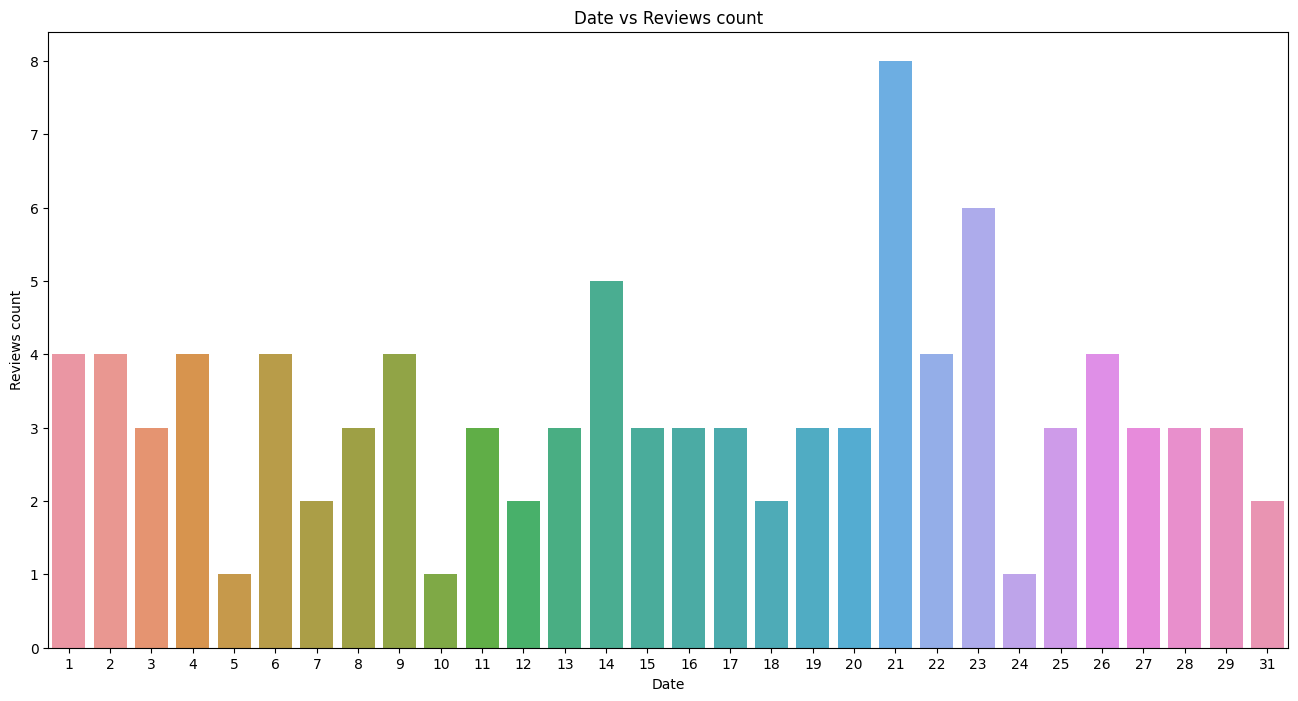

In [ ]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

In [ ]:
# Sentiment analysis

In [ ]:
data = df[['Review']]
data

,Review
0,Well I am using it from last 4 from and it is ...
1,I am writing this review after using 6 months....
2,I like the performance of mobile in this budge...
3,Nice product
4,Great performance and battery. Camera could ha...
...,...
95,Good
96,Superb and excellent phone
97,overall good mobile phone
98,I brought this phone last month and if you use...


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [ ]:
data

,Review
0,"well i using last 4 working smoothly, battery ..."
1,i writing review using 6 months. at budget pho...
2,i like performance mobile budget good.let acce...
3,nice product
4,great performance battery. camera could better...
...,...
95,good
96,superb excellent phone
97,overall good mobile phone
98,i brought phone last month use use battery bac...


In [ ]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,well using last working smoothly battery good ...,Well I am using it from last 4 from and it is ...
1,writing review using month budget phone actual...,I am writing this review after using 6 months....
2,like performance mobile budget good let accept...,I like the performance of mobile in this budge...
3,nice product,Nice product
4,great performance battery camera could better ...,Great performance and battery. Camera could ha...


In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [ ]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,well using last working smoothly battery good ...,Well I am using it from last 4 from and it is ...
1,writing review using month budget phone actual...,I am writing this review after using 6 months....
2,like performance mobile budget good let accept...,I like the performance of mobile in this budge...
3,nice product,Nice product
4,great performance battery camera could better ...,Great performance and battery. Camera could ha...
5,great product,Great product
6,product good satisy sim tray sim memory card u...,The product is good but I m not satisy with it...
7,camera quality pretty poor pale comparison lik...,"Camera quality is pretty poor, pales in compar..."
8,confort prize good configuration,Confort prize and good configuration
9,good device overalland good gaming,It's a good device overallAnd it's good for ga...


In [ ]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,well using last working smoothly battery good ...,Well I am using it from last 4 from and it is ...
1,writing review using month budget phone actual...,I am writing this review after using 6 months....
2,like performance mobile budget good let accept...,I like the performance of mobile in this budge...
3,nice product,Nice product
4,great performance battery camera could better ...,Great performance and battery. Camera could ha...
5,great product,Great product
6,product good satisy sim tray sim memory card u...,The product is good but I m not satisy with it...
7,camera quality pretty poor pale comparison lik...,"Camera quality is pretty poor, pales in compar..."
8,confort prize good configuration,Confort prize and good configuration
9,good device overalland good gaming,It's a good device overallAnd it's good for ga...


In [ ]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,well using last working smoothly battery good ...,Well I am using it from last 4 from and it is ...
1,writing review using month budget phone actual...,I am writing this review after using 6 months....
2,like performance mobile budget good let accept...,I like the performance of mobile in this budge...
3,nice product,Nice product
4,great performance battery camera could better ...,Great performance and battery. Camera could ha...
5,great product,Great product
6,product good satisy sim tray sim memory card u...,The product is good but I m not satisy with it...
7,camera quality pretty poor pale comparison lik...,"Camera quality is pretty poor, pales in compar..."
8,confort prize good configuration,Confort prize and good configuration
9,good device overalland good gaming,It's a good device overallAnd it's good for ga...


In [ ]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,well using last working smoothly battery good ...,Well I am using it from last 4 from and it is ...
1,writing review using month budget phone actual...,I am writing this review after using 6 months....
2,like performance mobile budget good let accept...,I like the performance of mobile in this budge...
3,nice product,Nice product
4,great performance battery camera could better ...,Great performance and battery. Camera could ha...
5,great product,Great product
6,product good satisy sim tray sim memory card u...,The product is good but I m not satisy with it...
7,camera quality pretty poor pale comparison lik...,"Camera quality is pretty poor, pales in compar..."
8,confort prize good configuration,Confort prize and good configuration
9,good device overalland good gaming,It's a good device overallAnd it's good for ga...


In [ ]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,well using last working smoothly battery good ...,Well I am using it from last 4 from and it is ...
1,writing review using month budget phone actual...,I am writing this review after using 6 months....
2,like performance mobile budget good let accept...,I like the performance of mobile in this budge...
3,nice product,Nice product
4,great performance battery camera could better ...,Great performance and battery. Camera could ha...
5,great product,Great product
6,product good satisy sim tray sim memory card u...,The product is good but I m not satisy with it...
7,camera quality pretty poor pale comparison lik...,"Camera quality is pretty poor, pales in compar..."
8,confort prize good configuration,Confort prize and good configuration
9,good device overalland good gaming,It's a good device overallAnd it's good for ga...


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,well using last working smoothly battery good ...,Well I am using it from last 4 from and it is ...
1,writing review using month budget phone actual...,I am writing this review after using 6 months....
2,like performance mobile budget good let accept...,I like the performance of mobile in this budge...
3,nice product,Nice product
4,great performance battery camera could better ...,Great performance and battery. Camera could ha...
5,great product,Great product
6,product good satisy sim tray sim memory card u...,The product is good but I m not satisy with it...
7,camera quality pretty poor pale comparison lik...,"Camera quality is pretty poor, pales in compar..."
8,confort prize good configuration,Confort prize and good configuration
9,good device overalland good gaming,It's a good device overallAnd it's good for ga...


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,well using last working smoothly battery good ...,Well I am using it from last 4 from and it is ...
1,writing review using month budget phone actual...,I am writing this review after using 6 months....
2,like performance mobile budget good let accept...,I like the performance of mobile in this budge...
3,nice product,Nice product
4,great performance battery camera could better ...,Great performance and battery. Camera could ha...
5,great product,Great product
6,product good satisy sim tray sim memory card u...,The product is good but I m not satisy with it...
7,camera quality pretty poor pale comparison lik...,"Camera quality is pretty poor, pales in compar..."
8,confort prize good configuration,Confort prize and good configuration
9,good device overalland good gaming,It's a good device overallAnd it's good for ga...


In [ ]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,well using last working smoothly battery good ...,Well I am using it from last 4 from and it is ...,"[well, using, last, working, smoothly, battery..."
1,writing review using month budget phone actual...,I am writing this review after using 6 months....,"[writing, review, using, month, budget, phone,..."
2,like performance mobile budget good let accept...,I like the performance of mobile in this budge...,"[like, performance, mobile, budget, good, let,..."
3,nice product,Nice product,"[nice, product]"
4,great performance battery camera could better ...,Great performance and battery. Camera could ha...,"[great, performance, battery, camera, could, b..."
5,great product,Great product,"[great, product]"
6,product good satisy sim tray sim memory card u...,The product is good but I m not satisy with it...,"[product, good, satisy, sim, tray, sim, memory..."
7,camera quality pretty poor pale comparison lik...,"Camera quality is pretty poor, pales in compar...","[camera, quality, pretty, poor, pale, comparis..."
8,confort prize good configuration,Confort prize and good configuration,"[confort, prize, good, configuration]"
9,good device overalland good gaming,It's a good device overallAnd it's good for ga...,"[good, device, overalland, good, gaming]"


In [ ]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

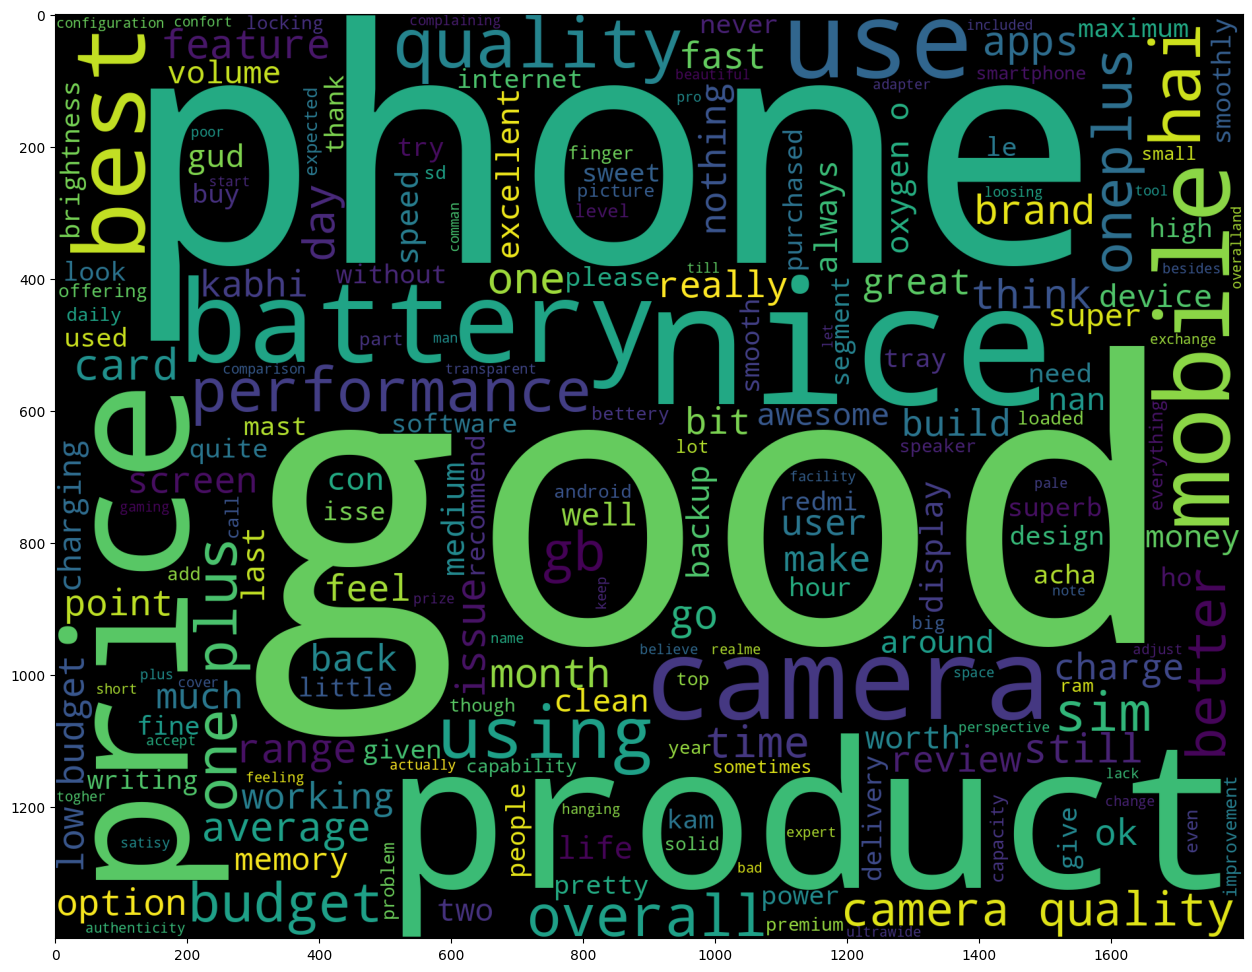

In [ ]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [ ]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

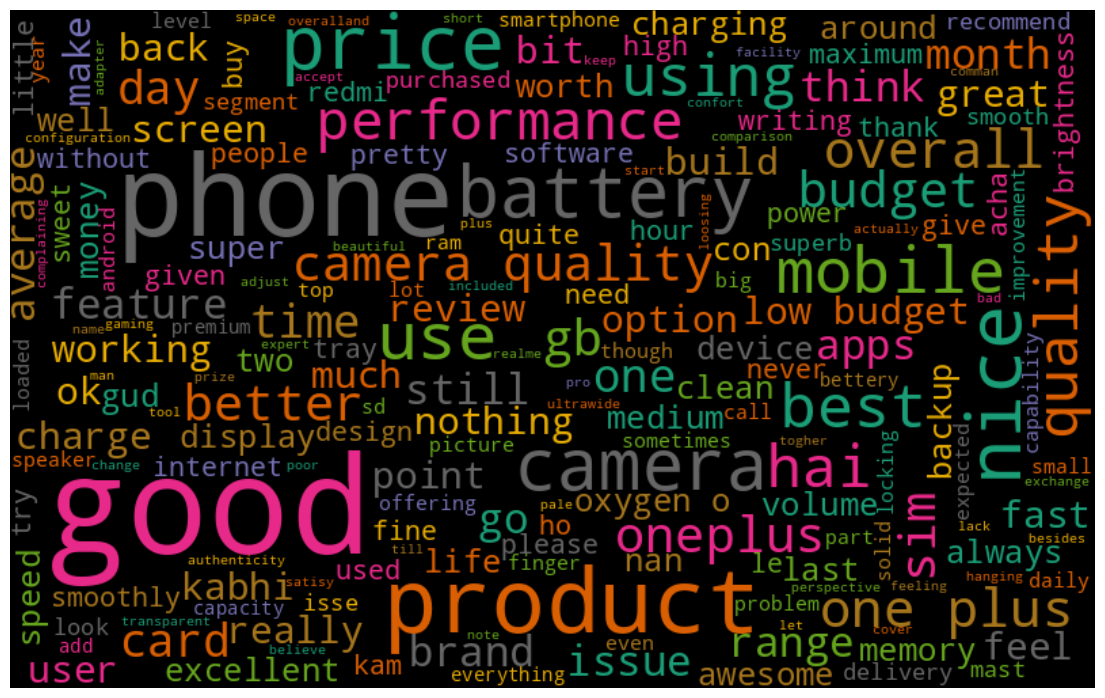

In [ ]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews']])
generate_wordcloud(all_words)